In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
udata = pd.read_csv('notebook.csv')
udata.head()


,Date,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
udata['Date'] = pd.to_datetime(udata['Date'],format = "%m/%d/%Y %H:%M:%S")
udata['DayOfWeekNum'] = udata['Date'].dt.dayofweek
udata['DayOfWeek'] = udata['Date'].dt.weekday_name
udata['HourOfDay'] = udata['Date'].dt.hour
udata.head()


,Date,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,0


Text(0.5,1,'Journeys by Day of Week')

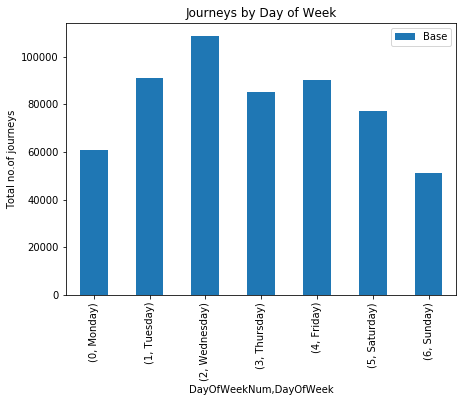

In [5]:
weekday_journeys = udata.pivot_table(index = ['DayOfWeekNum','DayOfWeek'],values = 'Base', aggfunc = 'count')


weekday_journeys.plot(kind = 'bar', figsize=(7,5))
plt.ylabel('Total no.of journeys')
plt.title('Journeys by Day of Week')

Text(0.5,1,'Journeys by Hour of Day')

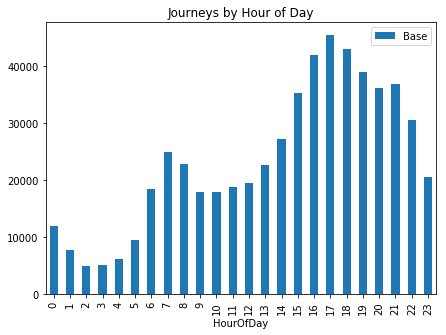

In [6]:
uber_hour = udata.pivot_table(index=['HourOfDay'],values='Base',aggfunc='count')
uber_hour.plot(kind='bar',figsize=(7,5))
plt.title('Journeys by Hour of Day')


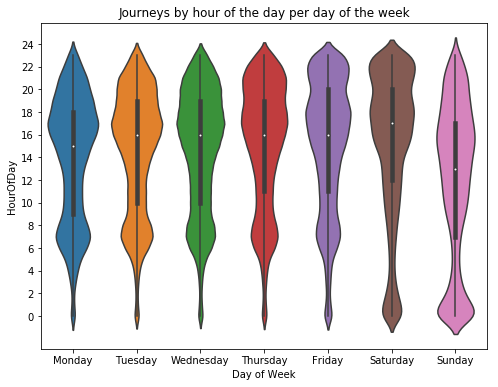

In [7]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)  
sns.violinplot('DayOfWeekNum','HourOfDay',data = udata)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel = 'Day of Week',yticks = np.arange(0,26,2),title = 'Journeys by hour of the day per day of the week')
plt.show()


In [8]:
from mpl_toolkits.basemap import Basemap

In [9]:
def update(frame_num):
    
    
    x, y = m(udata.Lon[udata['HourOfDay']==frame_num].values,udata.Lat[udata['HourOfDay']==frame_num].values)
    hex_.set_offsets(np.dstack((x, y)));
    hour_text.set_text('hour {}'.format(str(frame_num)))



In [10]:
fig = plt.figure(figsize=(18, 16))
fig.suptitle('Journeys through the day over New York City',fontsize = 40,fontweight='bold')
m = Basemap(projection = 'merc',llcrnrlat=40.50, urcrnrlat=40.92,llcrnrlon=-74.26, urcrnrlon=-73.70, lat_ts=40.50, resolution='i')
m.drawmapboundary(fill_color='blue')
x, y = m(udata.Lon[udata['HourOfDay']==0].values,udata.Lat[udata['HourOfDay']==0].values)
hex_ = m.hexbin(x, y,gridsize = 350, bins='log',cmap=cm.viridis);
hour_text = plt.text(-170, 50, 'hour {}'.format(str(0)),fontsize=40,color='white')
plt.close()
a = animation.FuncAnimation(fig, update, interval=100, frames = 24) 
a.save('animation.gif', writer='imagemagick', fps=2)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)



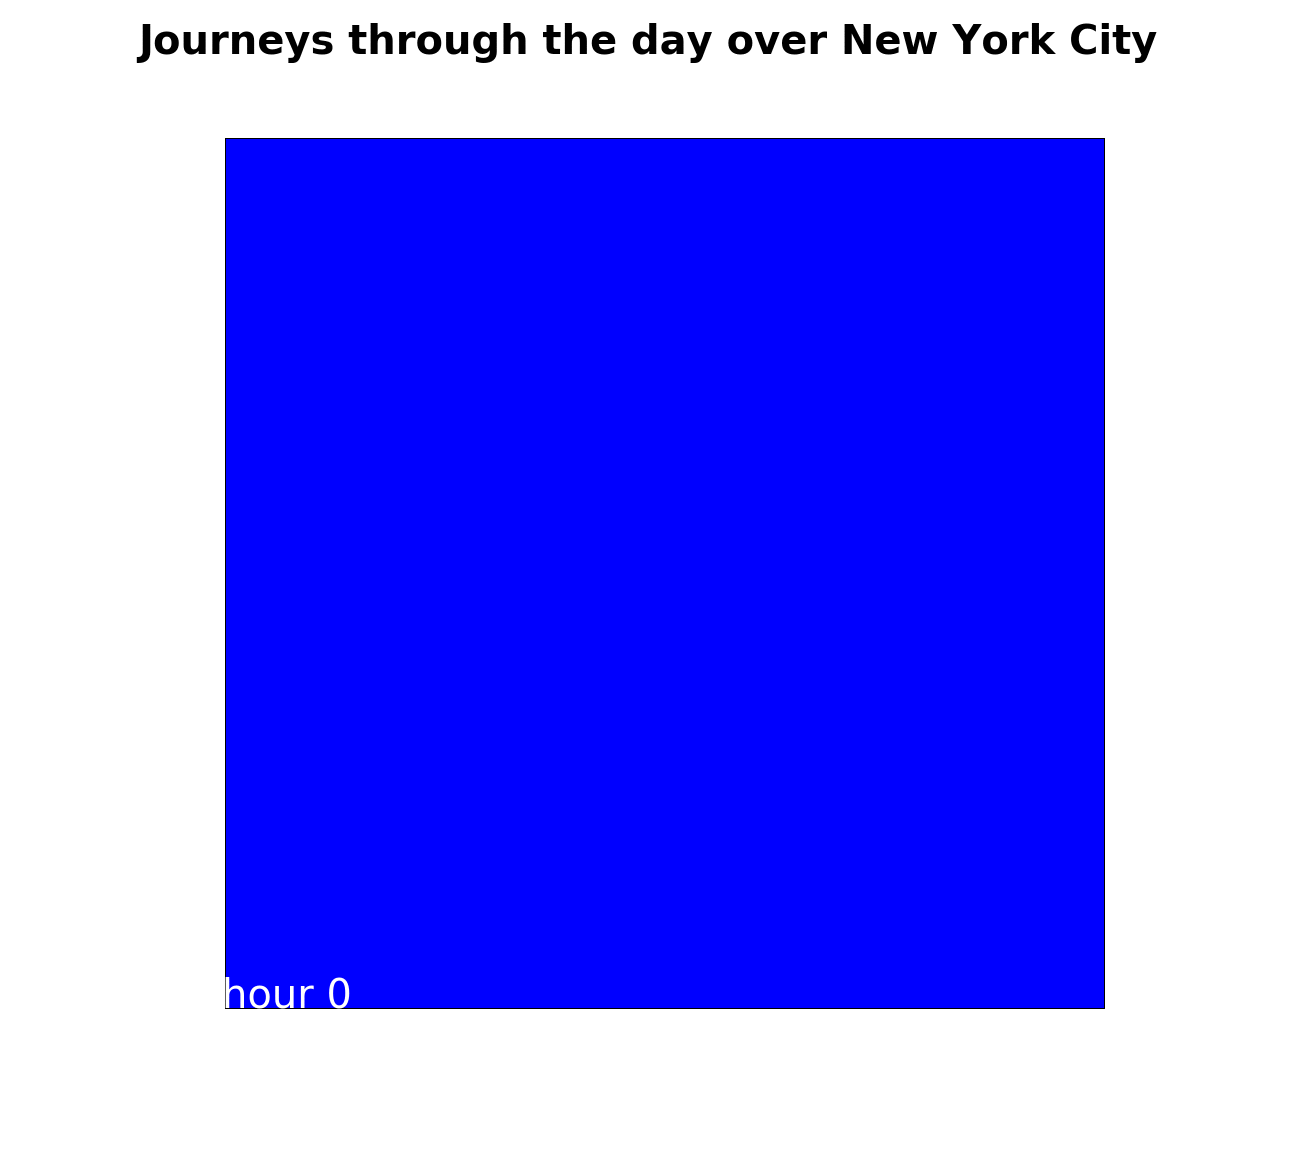

In [11]:
import io
import base64

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))